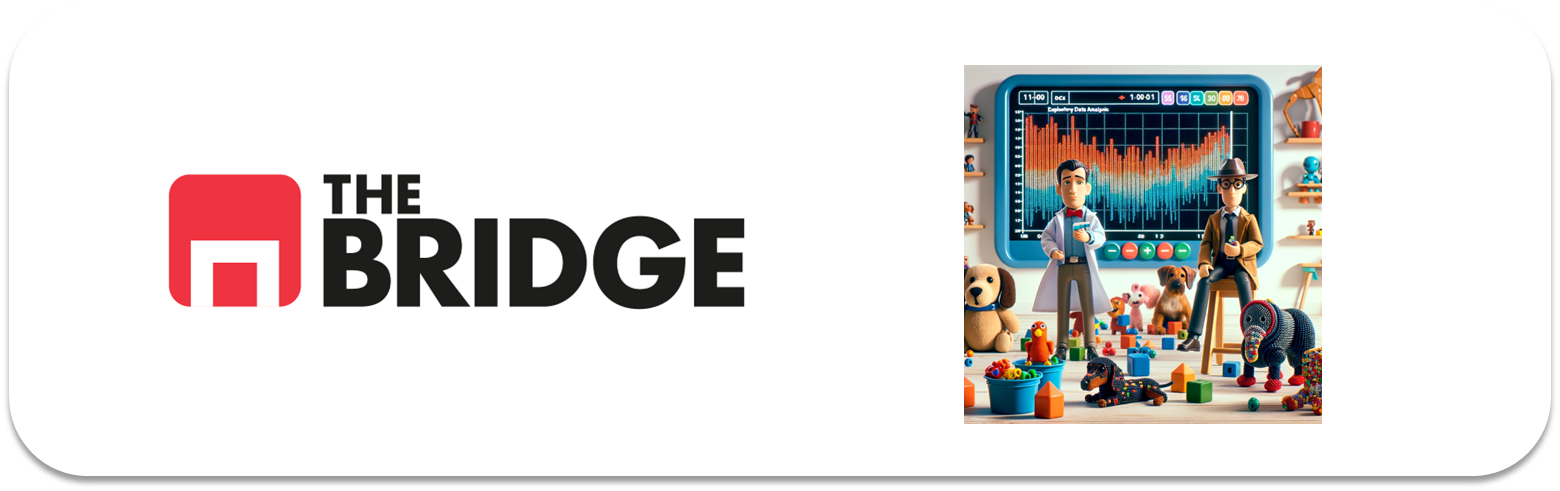

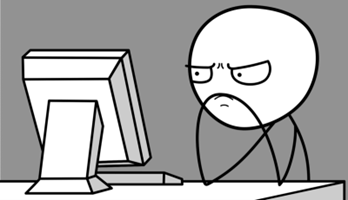

Para ejercitarte y afianzar lo aprendido sobre el análisis bivariante, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import bootcampviztools as booty
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Ejercicio 1

Carga el dataset de admisiones que conoces de la unidad anterior y que se encuentra en la ruta "./data/admission_data.csv", deshazte de las columnas innecesarias

In [2]:
admissionsDF = pd.read_csv("./data/admission_data.csv")

In [6]:
admissionsDF.drop(columns = ['Unnamed: 0', 'Year'], inplace=True)

### Ejercicio 2

Haz el análisis bivariante de "Admission" y "Major" (emplea las funciones del workout importándolas del módulo `bootcampviztools`, o utiliza las visualizaciones del notebook en el repositorio) y contesta a las siguientes preguntas:
* ¿Cuál es el departamento con el mayor porcentaje de admsiones?¿Y el de menor?
* ¿Existe alguna diferencia destacada entre los departamentos?

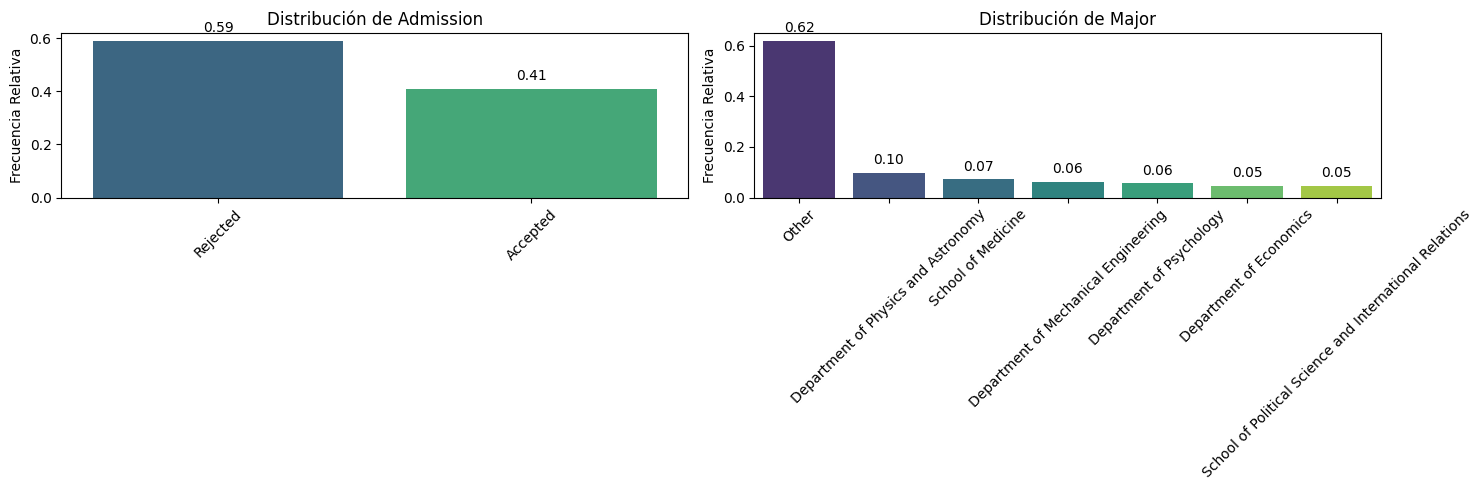

In [10]:
booty.pinta_distribucion_categoricas(admissionsDF, ["Admission", "Major"], relativa = True, mostrar_valores=True)

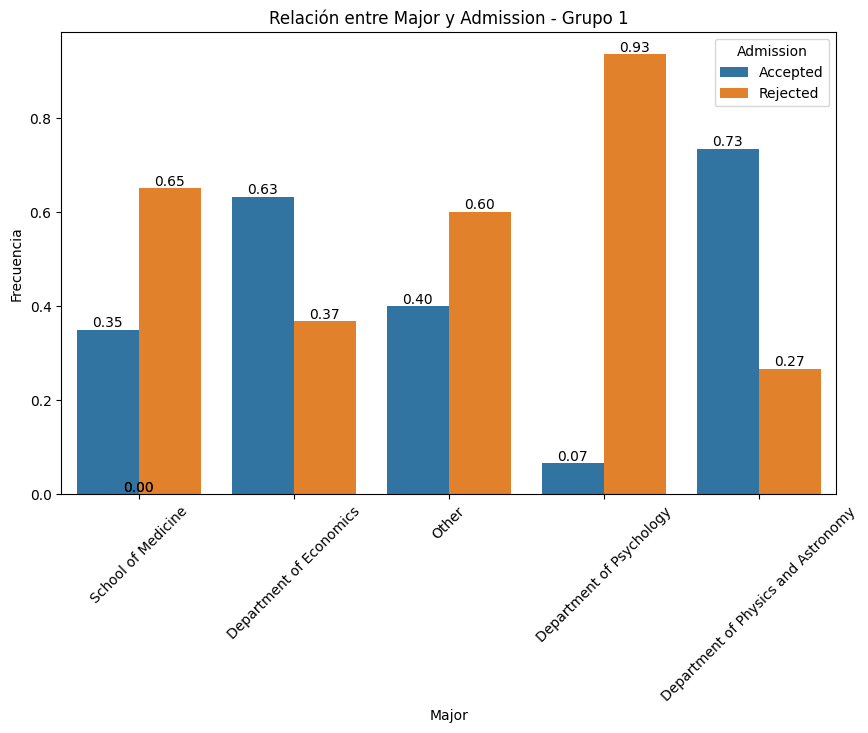

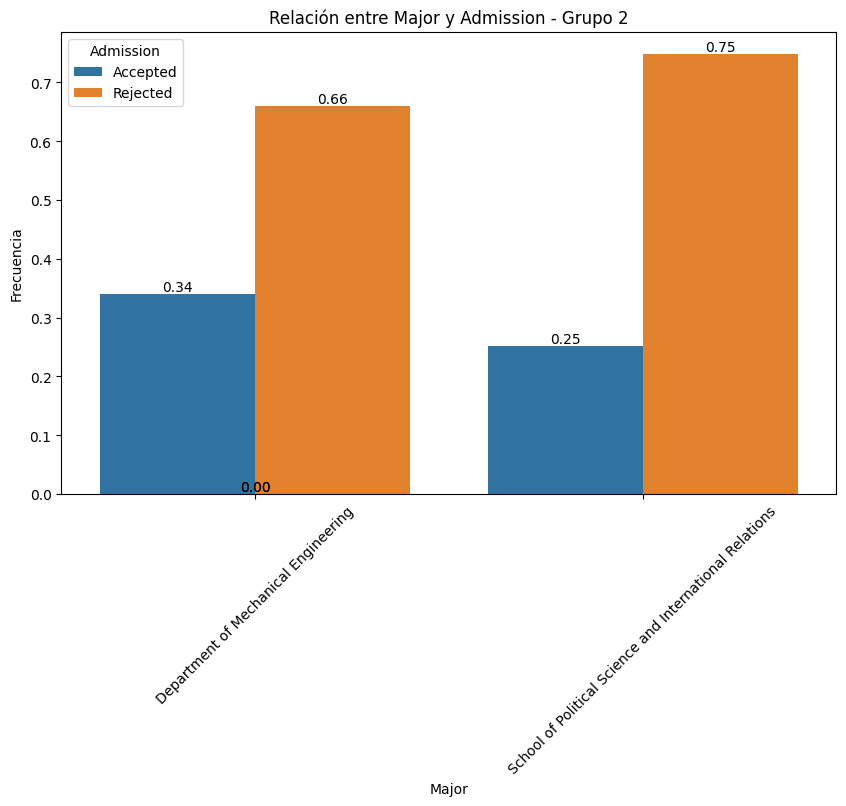

In [13]:
booty.plot_categorical_relationship_fin(admissionsDF, "Major", "Admission", relative_freq=True, show_values=True)

In [14]:
admissionsDF.groupby("Major", as_index=False)["Admission"].value_counts(normalize=True)

,Major,Admission,proportion
0,Department of Economics,Accepted,0.632479
1,Department of Economics,Rejected,0.367521
2,Department of Mechanical Engineering,Rejected,0.660354
3,Department of Mechanical Engineering,Accepted,0.339646
4,Department of Physics and Astronomy,Accepted,0.733547
5,Department of Physics and Astronomy,Rejected,0.266453
6,Department of Psychology,Rejected,0.934174
7,Department of Psychology,Accepted,0.065826
8,Other,Rejected,0.600707
9,Other,Accepted,0.399293


### Ejercicio 3

Repite el análisis para "Admission" y "Gender" y responde a las siguientes preguntas:
* ¿Existe una diferencia visual significativa entre el porcentaje de admitidos de cada género?
* ¿Cuál de los dos grupos tiene más admisiones?

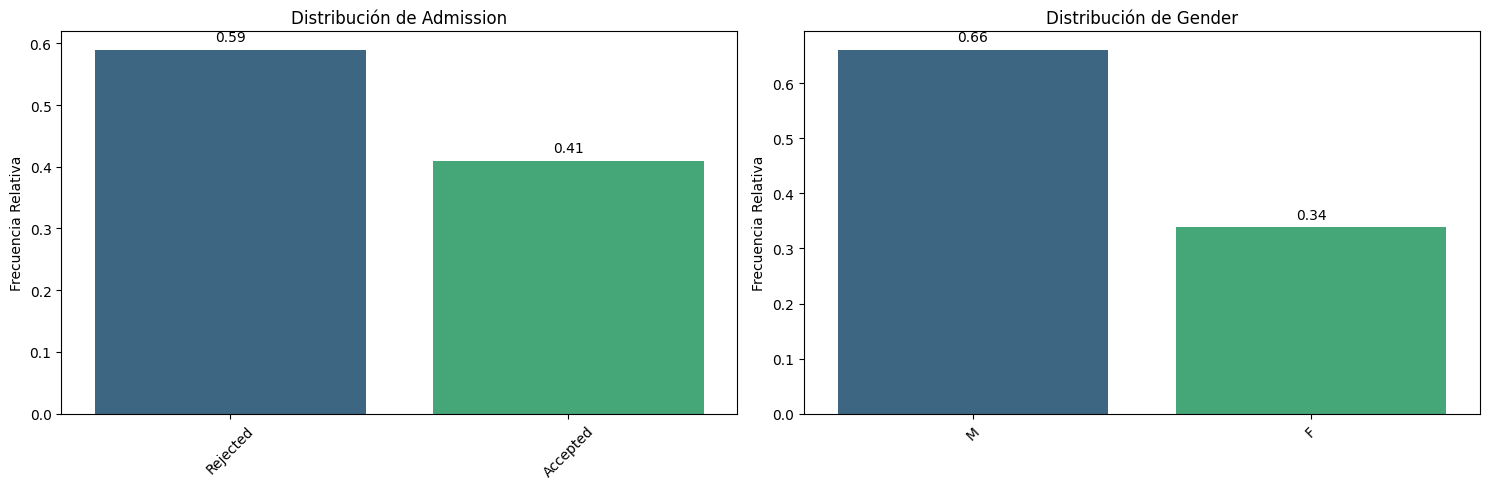

In [16]:
booty.pinta_distribucion_categoricas(admissionsDF, ["Admission", "Gender"], relativa = True, mostrar_valores=True)

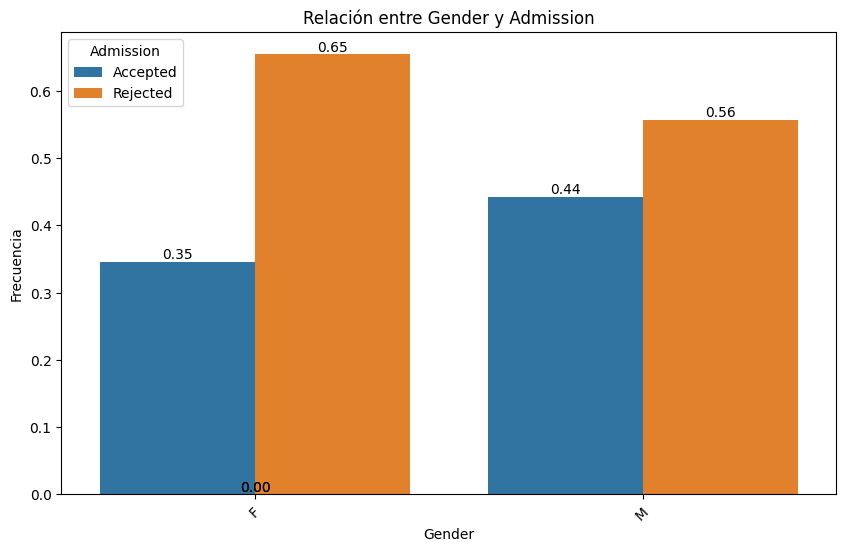

In [17]:
booty.plot_categorical_relationship_fin(admissionsDF, "Gender", "Admission", relative_freq=True, show_values=True)

In [19]:
admissionsDF.groupby("Gender", as_index=False)["Admission"].value_counts(normalize=True)

,Gender,Admission,proportion
0,F,Rejected,0.654247
1,F,Accepted,0.345753
2,M,Rejected,0.557214
3,M,Accepted,0.442786


IMPORTANT TAKEAWAYS:

***Accept/reject:***  
* 59% applicants are rejected
* 41% applicants are accepted

***Sex distribution:***  
* 66% applicants are male
* 34% applicants are female

***Accepted distribution:***  
* 35% female applicants are accepted
* 44% male applicants are accepted 

***Rejected distribution:***  
* 65% female applicants are rejected
* 56% male applicants are rejected 

**Slight skew in favor of male applicants with ratio of accepted:rejected applications**

Need to see for each department if this stays true

### Ejercicio 4

Carga el dataset de propinas (tips) que conoces de la unidad anterior y que se encuentra en la ruta "./data/tips.csv", deshazte de las columnas innecesarias

In [20]:
tipsDF = pd.read_csv("./data/tips.csv")

### Ejercicio 5

Haz el análisis bivariante de "tip" y "sex" (emplea las funciones del workout importándolas del módulo `bootcampviztools`, o utiliza las visualizaciones del notebook en el repositorio), añade el cálculo de la media y mediana de la variable continua por cada valor de la variable categórica, y contesta a las siguientes preguntas:
* ¿Existe alguna diferencia visualmente significativa entre las propinas de los grupos de la variable "sex"?
* ¿Son diferentes respecto al  conjunto total?

Perform a bivariate analysis of "tip" and "sex" (use the functions from the bootcampviztools module, or utilize the visualizations from the notebook in the repository). Additionally, calculate the mean and median of the continuous variable (tip) for each category of the categorical variable (sex). Answer the following questions:

* Is there any visually significant difference between the tips given by the groups in the "sex" variable?
* Are these differences significant when compared to the overall dataset?

In [24]:
tipsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


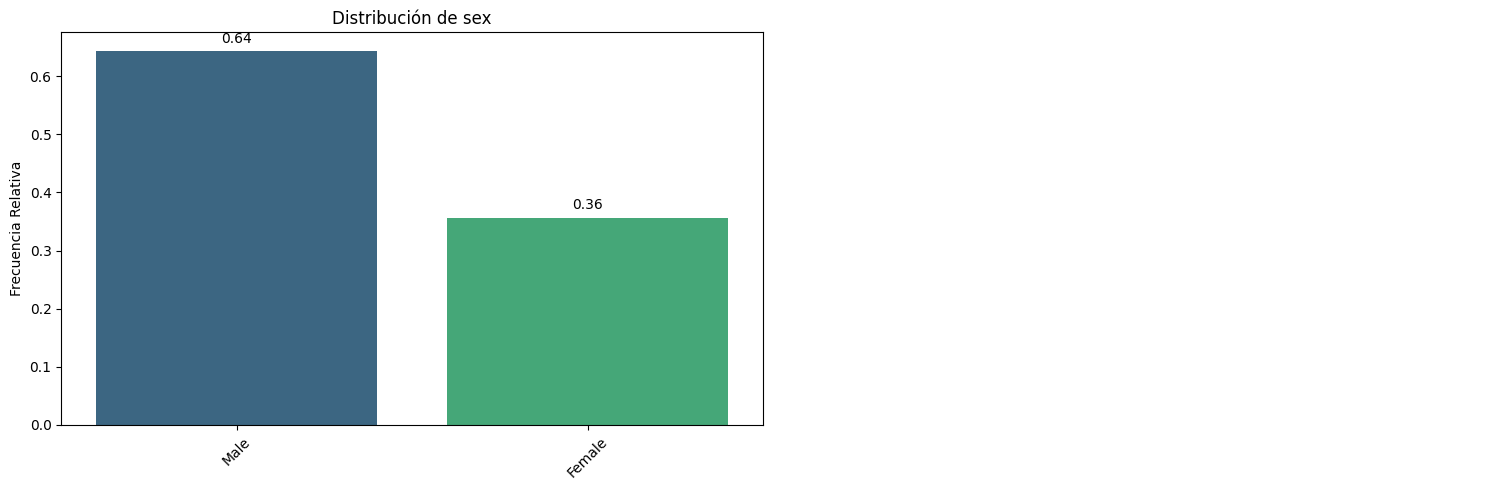

In [27]:
booty.pinta_distribucion_categoricas(tipsDF,['sex'],relativa=True,mostrar_valores=True)

(2,)


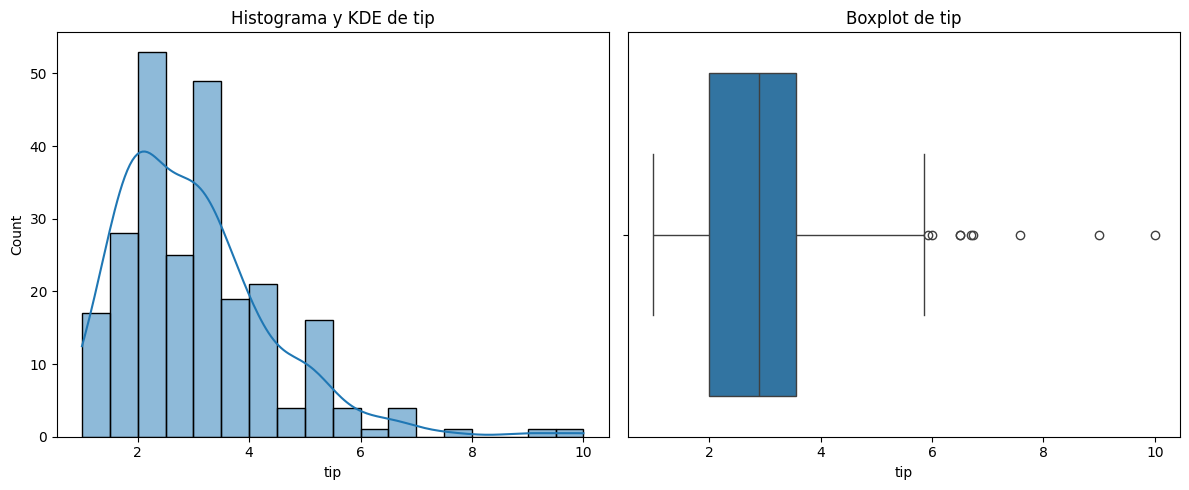

In [28]:
booty.plot_combined_graphs(tipsDF,['tip'])

In [39]:
tipsDF.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


In [62]:
median = tipsDF.groupby('sex', as_index=True)['tip'].median()
mean = tipsDF.groupby('sex')['tip'].mean()
print(f"{'Sex':<10}{'Median Tip':<15}{'Mean Tip':<15}")

for sex, median, mean in zip(median.index, median, mean):
    print(f"{sex:<10}{median:<15}{mean:<15}")

Sex       Median Tip     Mean Tip       
Female    2.75           2.833448275862069
Male      3.0            3.0896178343949043


In [63]:
median = tipsDF.groupby('sex', as_index=True)['tip'].median()
mean = tipsDF.groupby('sex')['tip'].mean().round(2)

measures = pd.DataFrame({'Median Tip': median,
                         'Mean Tip': mean}, index = median.index)

measures

,Median Tip,Mean Tip
sex,,
Female,2.75,2.83
Male,3.00,3.09


In [67]:
tipsDF['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

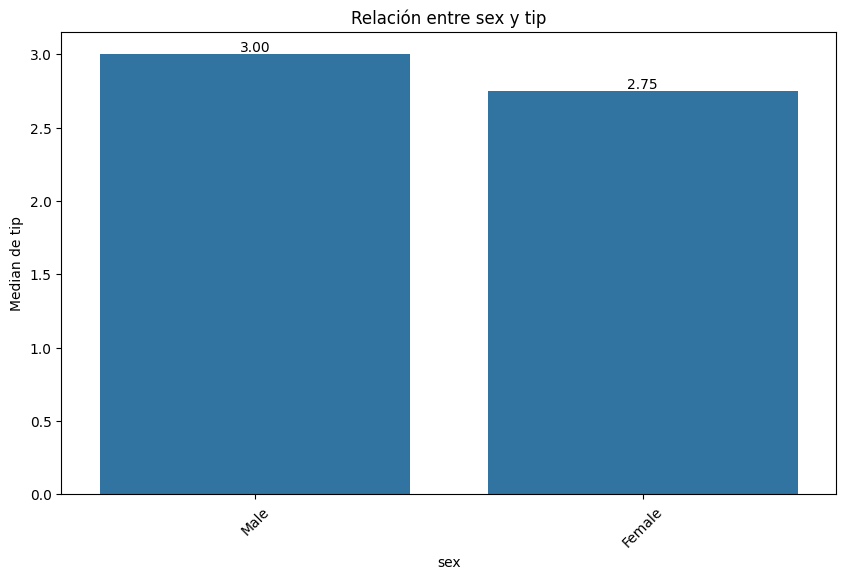

In [69]:
booty.plot_categorical_numerical_relationship(tipsDF, "sex","tip",show_values=True, measure="median")

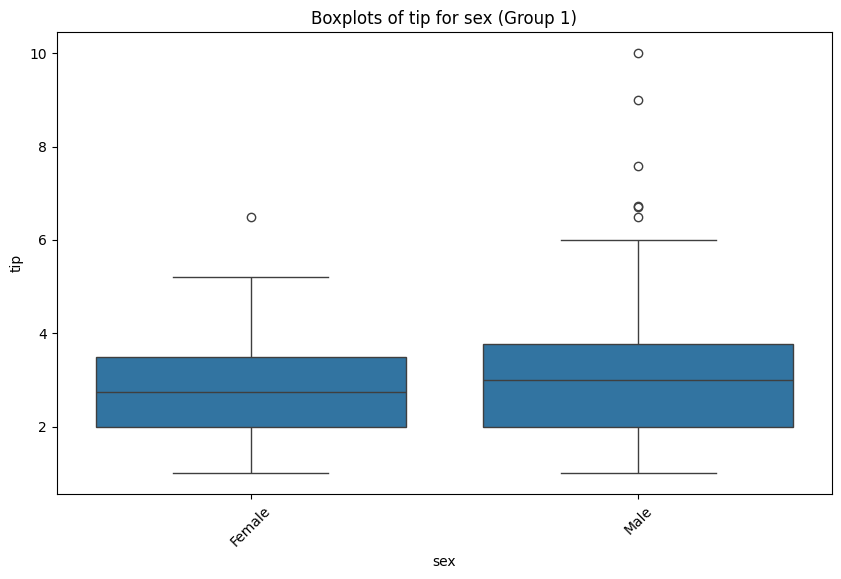

In [ ]:
booty.plot_grouped_boxplots(tipsDF, "sex", "tip")

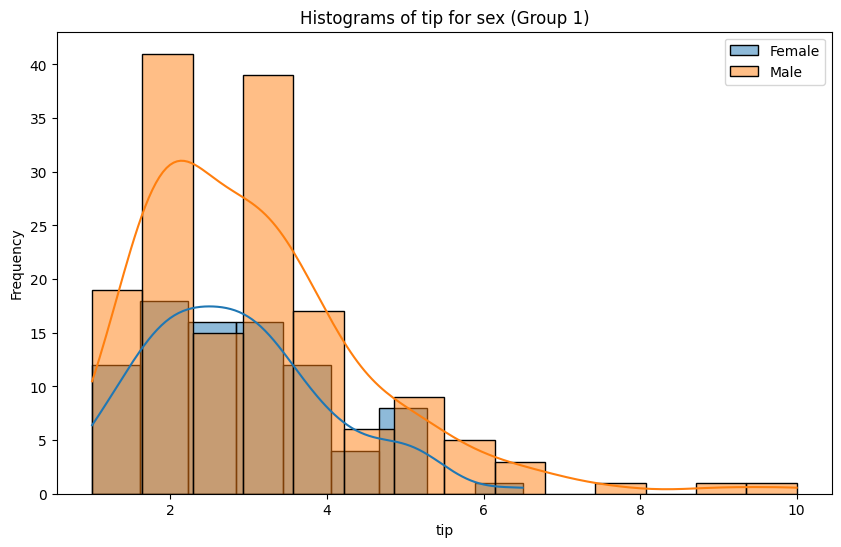

In [36]:
booty.plot_grouped_histograms(tipsDF, "sex", "tip", group_size=2)

1. Is there any visually significant difference between the tips given by the groups in the "sex" variable?

* Males show high freq of tipping ~ 2$ and 2.50$. Could look more into this to see if there is a link with the table size or bill total.
* Curious to see such big peaks around these amounts.
* males show higher dispersion and more outliers.

2. Are these differences significant when compared to the overall dataset?

Median whole dataset: 2.90  
Mean whole dataset: 2.99

|sex|median|mean|
|-|-|-|
|Female|2.75|2.83|
|Male|3.00|3.09|

Mann Whitney U test:  
No statistically significant differences  
 
z-score comparison:  
No statistically significant differences between means of each group and the overall dataset

In [70]:
from scipy.stats import mannwhitneyu

In [75]:
female_tips = tipsDF[tipsDF['sex'] == 'Female']['tip']
male_tips = tipsDF[tipsDF['sex'] == 'Male']['tip']

In [77]:
u_stat, p_val = mannwhitneyu(female_tips, male_tips,alternative='two-sided')

In [79]:
print(f'U-stat: {u_stat:.4f}')
print(f'P-val: {p_val:.4f}')

if p_val < 0.05:
    print('The difference in median tips between males and females is statistically significant')
else:
    print('The difference in median tips between males and females is NOT statistically significant')


U-stat: 6369.5000
P-val: 0.3834
The difference in median tips between males and females is NOT statistically significant


In [80]:
import scipy.stats as stats

In [81]:
overall_mean = tipsDF['tip'].mean()
overall_std = tipsDF['tip'].std()

In [82]:
female_z = (female_tips.mean() - overall_mean) / overall_std
male_z = (male_tips.mean() - overall_mean) / overall_std

In [84]:
print(f'Female tips z-score: {female_z:.4f}')
print(f'Male tips z-score: {male_z:.4f}')

Female tips z-score: -0.1191
Male tips z-score: 0.0660


In [90]:
for label, z_score in (('females', female_z), ('males', male_z)):
    if z_score > 1.96:
        print(f'The mean tip for {label} is significantly different from the overall mean tip')
    else:
        print(f'The mean tip for {label} is NOT significantly different from the overall mean tip')


The mean tip for females is NOT significantly different from the overall mean tip
The mean tip for males is NOT significantly different from the overall mean tip


### Ejercicio 6

Repite el análisis pero esta vez para "tip" y "smoker", añade también el cálculo de la media y de la mediana de la variable continua por cada valor de la variable categórica, y contesta a las siguiente pregunta:
* ¿Existe alguna diferencia visualmente significativa entre las propinas de los grupos de la variable "smoker"?

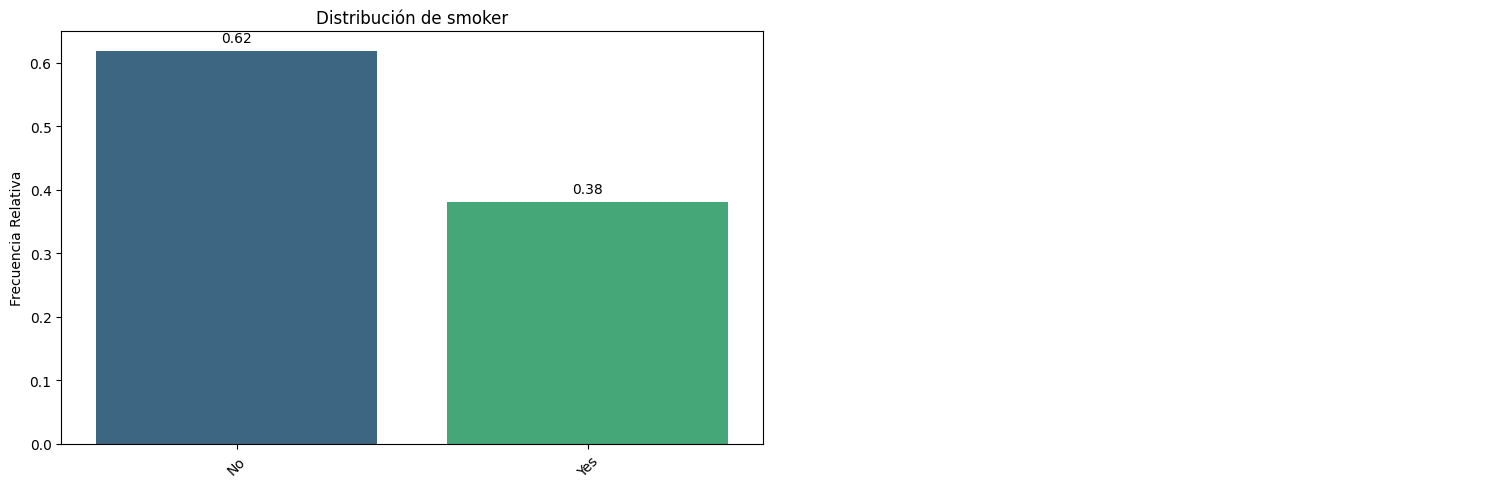

In [92]:
booty.pinta_distribucion_categoricas(tipsDF,['smoker'],relativa=True,mostrar_valores=True)

(2,)


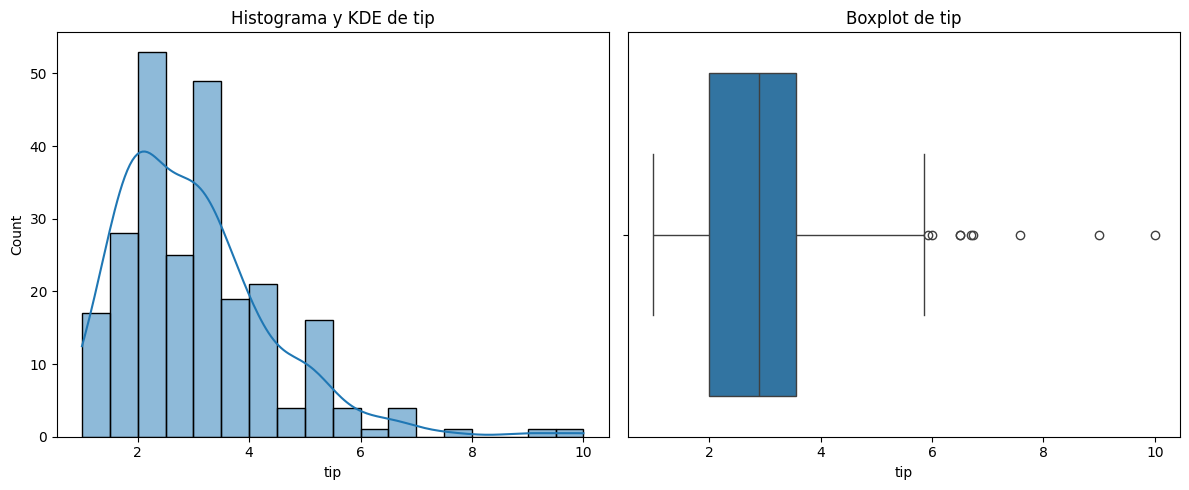

In [93]:
booty.plot_combined_graphs(tipsDF,['tip'])

In [94]:
median_smk = tipsDF.groupby('smoker', as_index=True)['tip'].median()
mean_smk = tipsDF.groupby('smoker')['tip'].mean().round(2)

smoker_tips = pd.DataFrame({'Median Tip': median_smk,
                         'Mean Tip': mean_smk}, index = median_smk.index)

smoker_tips

,Median Tip,Mean Tip
smoker,,
No,2.74,2.99
Yes,3.00,3.01


In [95]:
tipsDF['tip'].describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

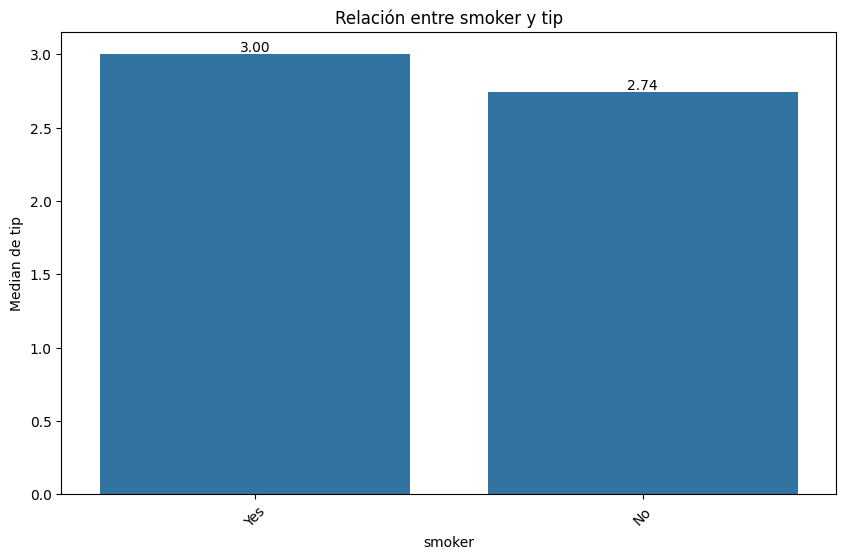

In [96]:
booty.plot_categorical_numerical_relationship(tipsDF, "smoker","tip",show_values=True, measure="median")

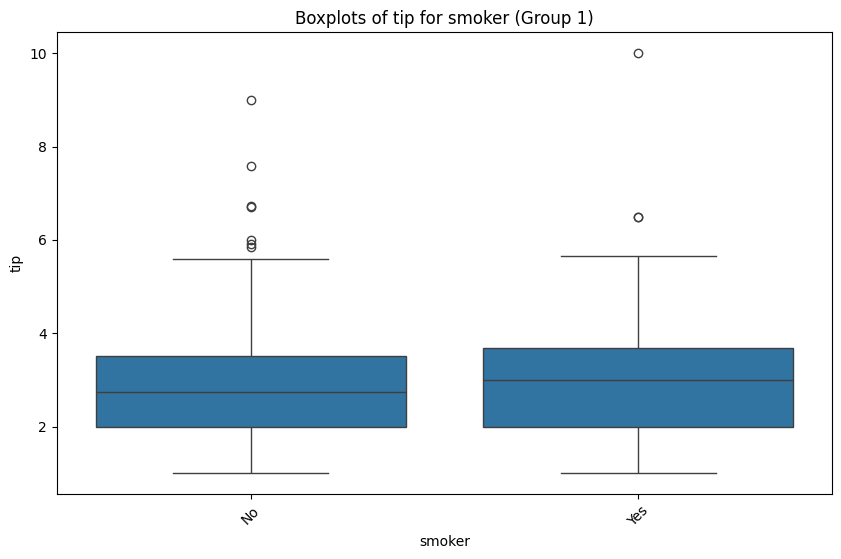

In [97]:
booty.plot_grouped_boxplots(tipsDF, "smoker", "tip")

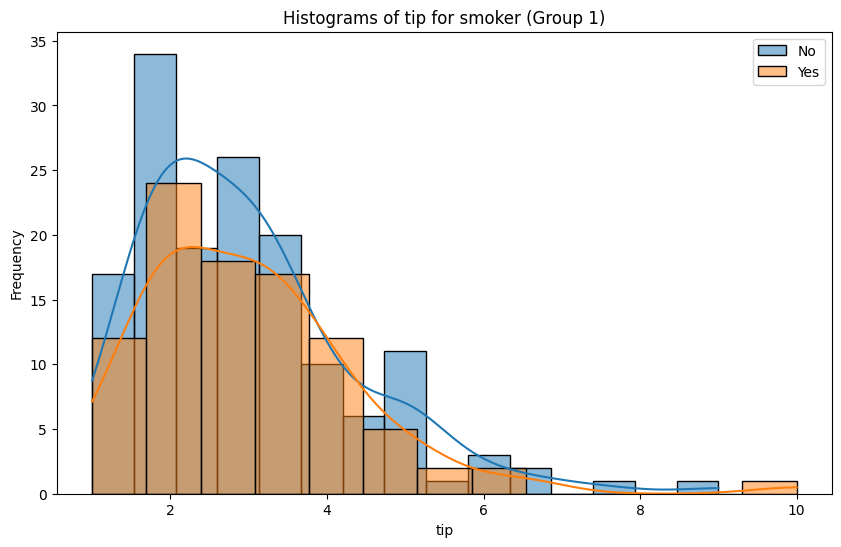

In [98]:
booty.plot_grouped_histograms(tipsDF, "smoker", "tip", group_size=2)

In [99]:
smk_tips = tipsDF[tipsDF['smoker'] == 'Yes']['tip']
nosmk_tips = tipsDF[tipsDF['smoker'] == 'No']['tip']

In [100]:
u_stat, p_val = mannwhitneyu(smk_tips, nosmk_tips,alternative='two-sided')

In [101]:
print(f'U-stat: {u_stat:.4f}')
print(f'P-val: {p_val:.4f}')

if p_val < 0.05:
    print('The difference in median tips between smokers and non-smokers is statistically significant')
else:
    print('The difference in median tips between smokers and non-smokers is NOT statistically significant')


U-stat: 7163.0000
P-val: 0.7919
The difference in median tips between smokers and non-smokers is NOT statistically significant


In [102]:

overall_mean = tipsDF['tip'].mean()
overall_std = tipsDF['tip'].std()

smoker_z = (smk_tips.mean() - overall_mean) / overall_std
non_smoker_z = (nosmk_tips.mean() - overall_mean) / overall_std

print(f'Smoker tips z-score: {smoker_z:.4f}')
print(f'Non-smoker tips z-score: {non_smoker_z:.4f}')

for label, z_score in (('Smokers', smoker_z), ('Non-smoker', non_smoker_z)):
    if z_score > 1.96:
        print(f'The mean tip for {label} is significantly different from the overall mean tip')
    else:
        print(f'The mean tip for {label} is NOT significantly different from the overall mean tip')


Smoker tips z-score: 0.0075
Non-smoker tips z-score: -0.0046
The mean tip for Smokers is NOT significantly different from the overall mean tip
The mean tip for Non-smoker is NOT significantly different from the overall mean tip


### Ejericicio 7

Carga ahora el datase de accidentes de coches, que se encuentra en la ruta "./data/car_crashes.csv" y deshazte de las columnas innecesarias

In [105]:
crashesDF = pd.read_csv('./data/car_crashes.csv', sep='|')

In [106]:
crashesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51 non-null     int64  
 1   total           51 non-null     float64
 2   speeding        51 non-null     float64
 3   alcohol         51 non-null     float64
 4   not_distracted  51 non-null     float64
 5   no_previous     51 non-null     float64
 6   ins_premium     51 non-null     float64
 7   ins_losses      51 non-null     float64
 8   abbrev          51 non-null     object 
dtypes: float64(7), int64(1), object(1)
memory usage: 3.7+ KB


### Ejercicio 8

Haz un analisis bivairante entre "total" y "speeding". Muestra su diagrama de dispersión y su valor de correlación de pearson obtenido con pandas. Luego contesta a la siguiente pregunta
* ¿Existe alguna relación visual entre las variables?¿Y numérica?

(2,)


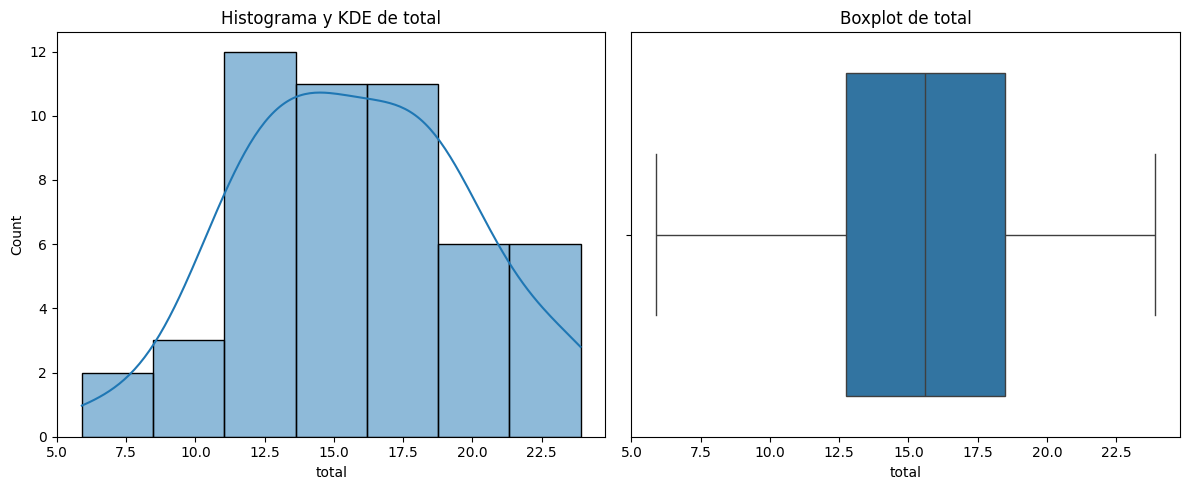

In [107]:
booty.plot_combined_graphs(crashesDF,['total'])

(2,)


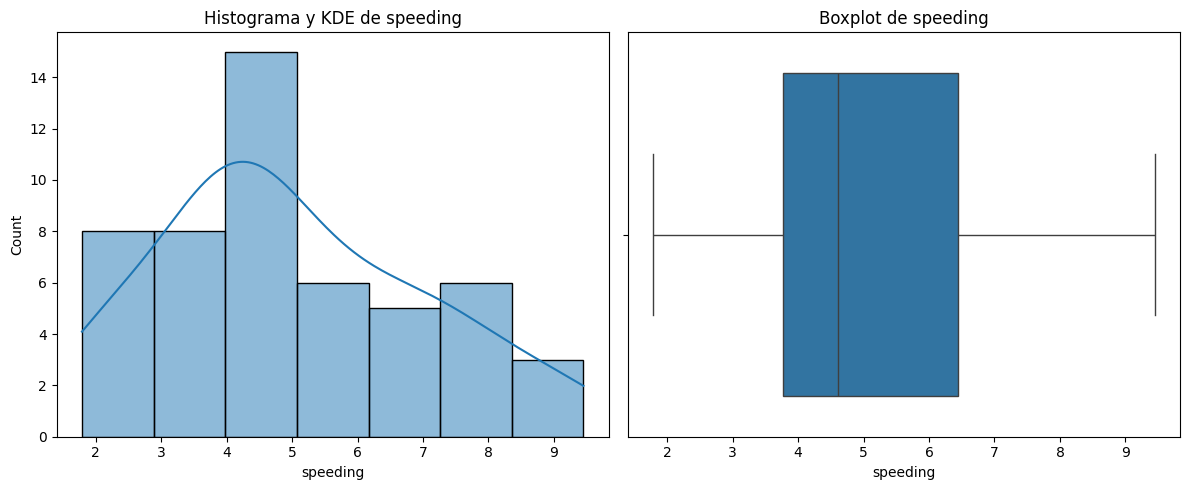

In [108]:
booty.plot_combined_graphs(crashesDF, ['speeding'])

In [109]:
crashesDF[['total', 'speeding']].describe()

,total,speeding
count,51.000000,51.000000
mean,15.790196,4.998196
std,4.122002,2.017747
min,5.900000,1.792000
25%,12.750000,3.766500
50%,15.600000,4.608000
75%,18.500000,6.439000
max,23.900000,9.450000


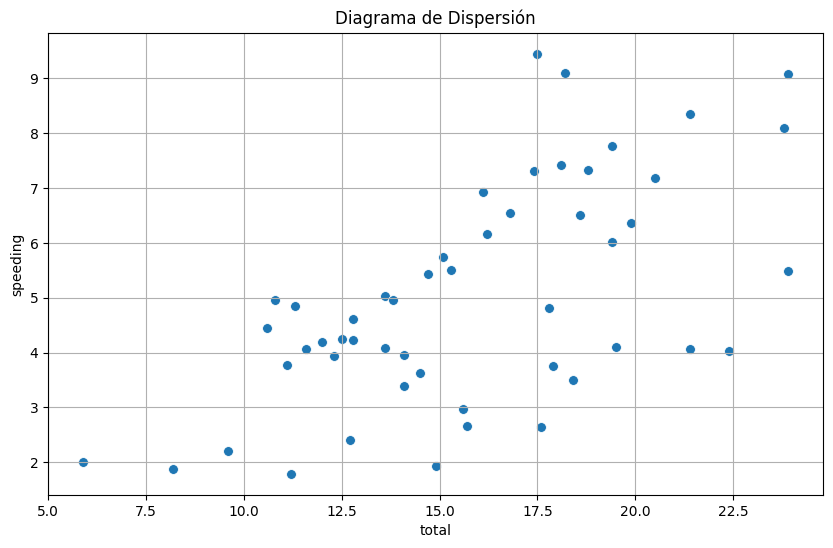

In [110]:
booty.grafico_dispersion_con_correlacion(crashesDF, "total", "speeding")

¿Existe alguna relación visual entre las variables?¿Y numérica?

Looks like quite dispersed data but there is a positive correlation between total fatalities and number of accidents that were the result of speeding.

### Ejercicio 9

Usa scipy tal como lo hicimos en el workout para hacer el test de correlación. ¿Cuál es el p-value?¿Qué podemos decir de la correlación lineal entre "total" y "speeding"?

In [111]:
crashesDF[["total", "speeding"]].corr()

,total,speeding
total,1.000000,0.611548
speeding,0.611548,1.000000


In [112]:
from scipy.stats import pearsonr

In [116]:
correl_stat, pval = pearsonr(crashesDF['total'], crashesDF['speeding'], alternative='less')

In [118]:
print(f'Correlation Statistic: {correl_stat}')
print(f'P-Value: {pval}')
if pval < 0.05:
    print('The correlation between "total" and "speeding" is statistically significant')
else:
        print('The correlation between "total" and "speeding" is NOT statistically significant')

Correlation Statistic: 0.6115476008001185
P-Value: 0.9999990664804446
the correlation between "total" and "speeding" is NOT statistically significant


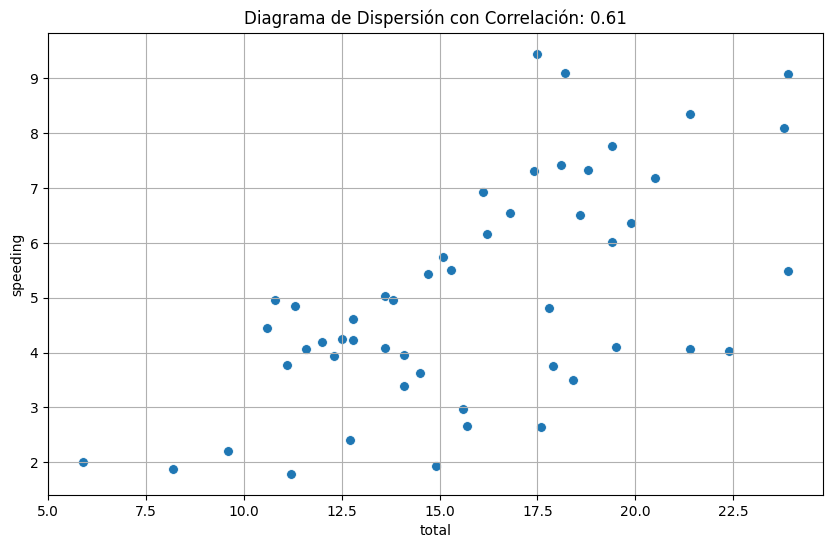

In [115]:
booty.grafico_dispersion_con_correlacion(crashesDF, "total", "speeding", mostrar_correlacion=True)